In [1]:
bulk=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.bulk_2021-03-23.lowMOI.csv',
              sep=',',header=TRUE,row.names=1)
head(bulk)

,SAMD11,HES4,ISG15,TMEM52,ERRFI1,ENO1,FBXO2,EFHD2,IFFO2,UBR4,⋯,CCT8,EVA1C,CBR3,ETS2,TFF1,PDXK,COL18A1,MT.ND1,MT.ND5,MT.ND6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT,-0.047144081,-0.0928697512,0.057742756,0.017592130,-0.10131870,-0.10032029,0.145128503,-0.10844591,-0.05018817,0.014004662,⋯,-0.0898705944,0.037356049,-0.09126782,0.0651195869,0.12359993,0.24383472,-0.002287531,0.075872809,0.067886926,0.009750905
E285K,-0.017873397,0.0067138248,-0.032198798,-0.018950010,0.03623769,0.01353731,-0.003509361,0.04243719,-0.02824910,0.024097027,⋯,0.0279320516,-0.003378314,-0.03990592,0.0001639556,0.04572356,-0.09065682,-0.038251176,0.063053817,-0.003601742,-0.056448080
G245S,0.009710189,-0.0406864770,0.002122559,-0.018040251,0.01263522,-0.01299148,-0.031114772,-0.04313610,0.05441413,0.015317069,⋯,0.0101339491,-0.003256325,0.04819853,0.0411643535,0.01110057,-0.06754171,-0.043496512,0.028606959,-0.008873163,0.018478394
G244C,0.021032700,0.0000290035,-0.027289998,-0.009989356,0.07608464,0.08804470,-0.027361486,0.04669304,-0.01933067,-0.025601164,⋯,0.0104702879,-0.020411287,0.01663650,0.0049890978,-0.04087605,-0.09629209,-0.027338210,-0.009191647,-0.032387398,-0.041922729
V216V,-0.029679136,-0.0359791368,0.026290637,-0.001415059,-0.05329370,-0.06546541,0.083853088,-0.04491176,0.07527173,0.006408895,⋯,0.0004331946,0.028532267,-0.12577218,0.0299849249,-0.03836858,0.13628596,0.024854774,0.061921652,0.034654990,0.025728436
L194R,0.063228846,0.0135409748,-0.021424675,0.010970043,0.03157172,0.03402866,-0.027784409,0.07856683,-0.05565449,0.032640234,⋯,-0.0461769067,-0.002624244,0.02096188,-0.0079057999,0.01226125,-0.04095843,-0.050175071,0.047236197,0.064903997,-0.063528389


In [2]:
length(rownames(bulk))

[1] 100

In [3]:
rownames(bulk)

[1] "WT"         "E285K"      "G245S"      "G244C"      "V216V"     
  [6] "L194R"      "R175H"      "R249S"      "P278S"      "V216M"     
 [11] "G360V"      "P152L"      "R158R"      "S241C"      "R337C"     
 [16] "P58R"       "R273H"      "unassigned" "R280K"      "R158H"     
 [21] "S366A"      "P153P"      "V173L"      "G105C"      "Y234C"     
 [26] "R213Q"      "E339K"      "M246V"      "R280T"      "A159P"     
 [31] "Y163C"      "P295P"      "P222P"      "P301P"      "T312S"     
 [36] "E286K"      "S127F"      "H179R"      "C176F"      "C135Y"     
 [41] "A83V"       "R273L"      "G154V"      "P250L"      "Y220C"     
 [46] "R248L"      "Y236C"      "C275Y"      "H214R"      "P151S"     
 [51] "C135F"      "H193L"      "C238F"      "R248W"      "T170T"     
 [56] "K132R"      "R158L"      "C238Y"      "G266V"      "R273C"     
 [61] "P47P"       "T118T"      "V272L"      "C242F"      "Y205C"     
 [66] "G245D"      "I195T"      "H193Y"      "P278L"      "R282W"     
 [71] "Q5R"        "C275F"      "V272M"      "S241F"      "G245V"     
 [76] "C176Y"      "E271K"      "P359P"      "L344L"      "G245C"     
 [81] "C277F"      "H193R"      "H179Y"      "A159V"      "E2E"       
 [86] "R337L"      "R249M"      "M237I"      "D21D"       "K132N"     
 [91] "V173M"      "V31I"       "G266E"      "C141Y"      "V157F"     
 [96] "P36P"       "G266R"      "Y107H"      "R110L"      "P47S"

In [4]:
scores_init=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.scores.lowMOI.csv',
                 sep=',',header=TRUE,row.names=1)
print(head(scores_init))
scores_init=scores_init[rownames(bulk),]
scores=data.frame(score=as.numeric(as.character(scores_init[,'HotellingT2.mean'])))
rownames(scores)=rownames(scores_init)
colnames(scores)='score'
head(scores)

      HotellingT2.mean HotellingT2.ci.0.95.low HotellingT2.ci.0.95.high
WT            27.78296                22.68818                 32.87774
E285K        270.24380               246.79326                293.69433
G245S        313.69397               288.92935                338.45860
G244C        359.24916               329.15780                389.34052
V216V         39.51658                33.14429                 45.88886
L194R        274.03897               252.42528                295.65266
      HotellingT2.q
WT        0.5367576
E285K     0.0000100
G245S     0.0000100
G244C     0.0000100
V216V     0.2079027
L194R     0.0000100


,score
,<dbl>
WT,27.78296
E285K,270.24380
G245S,313.69397
G244C,359.24916
V216V,39.51658
L194R,274.03897


In [5]:
scores['P36P',]

[1] 29.16871

In [6]:
bulk_corr=cor(t(bulk),method='spearman')

In [7]:
x=bulk_corr
hc <- hclust(dist(x,method='manhattan'),method='complete')

In [8]:
options(repr.plot.width=20, repr.plot.height=4)

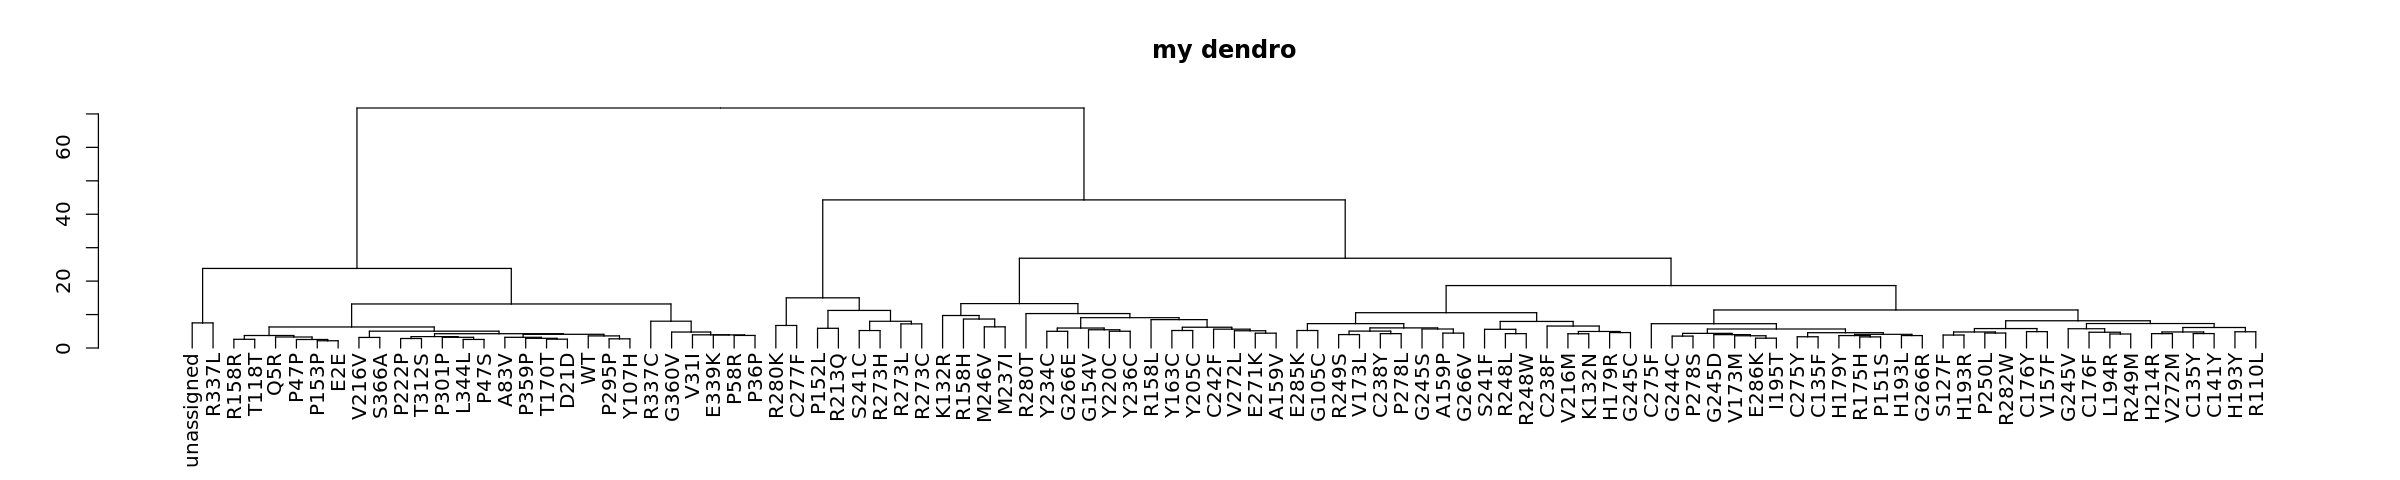

In [9]:
dd <- as.dendrogram(hc)
plot(dd, main = "my dendro")

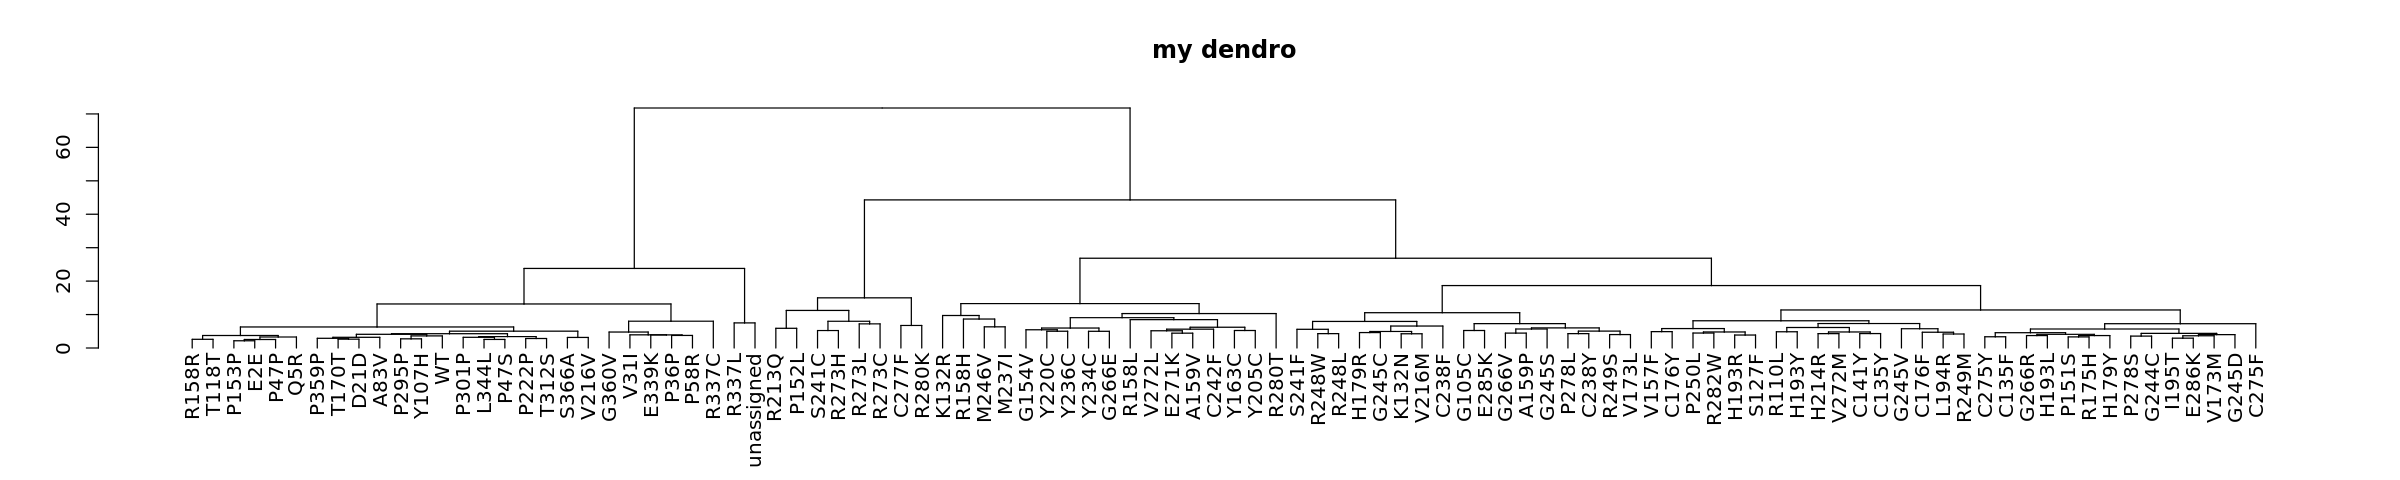

In [10]:
dd.reorder <- reorder(dd, wts=scores[rownames(x),'score'],agglo.FUN = mean)
plot(dd.reorder, main = "my dendro")

In [11]:
require(dendextend)

Loading required package: dendextend


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




In [12]:
dend <- color_branches(dd.reorder, k=3) 

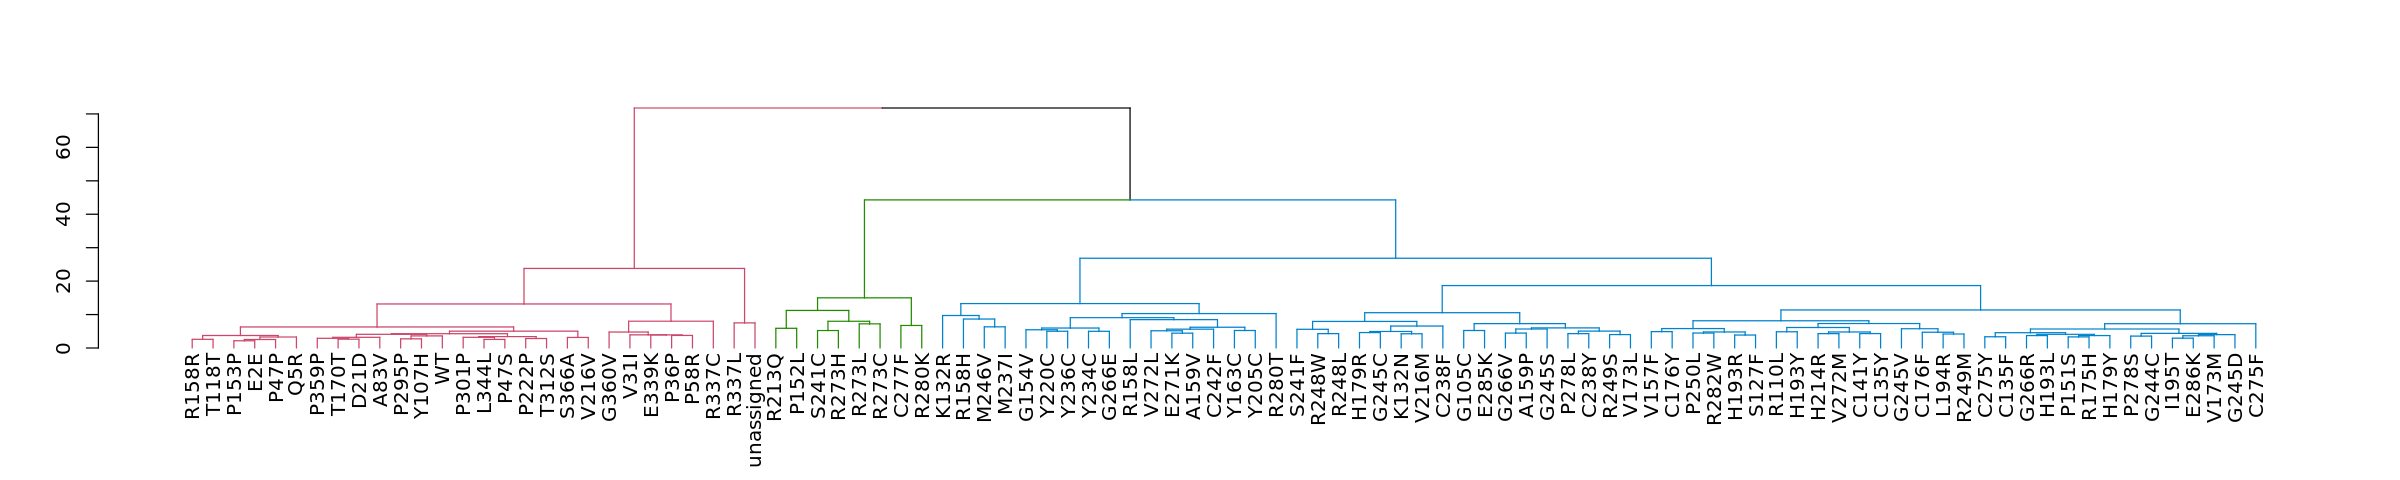

In [13]:
plot(dend,col=c('black','lightblue','blue'))

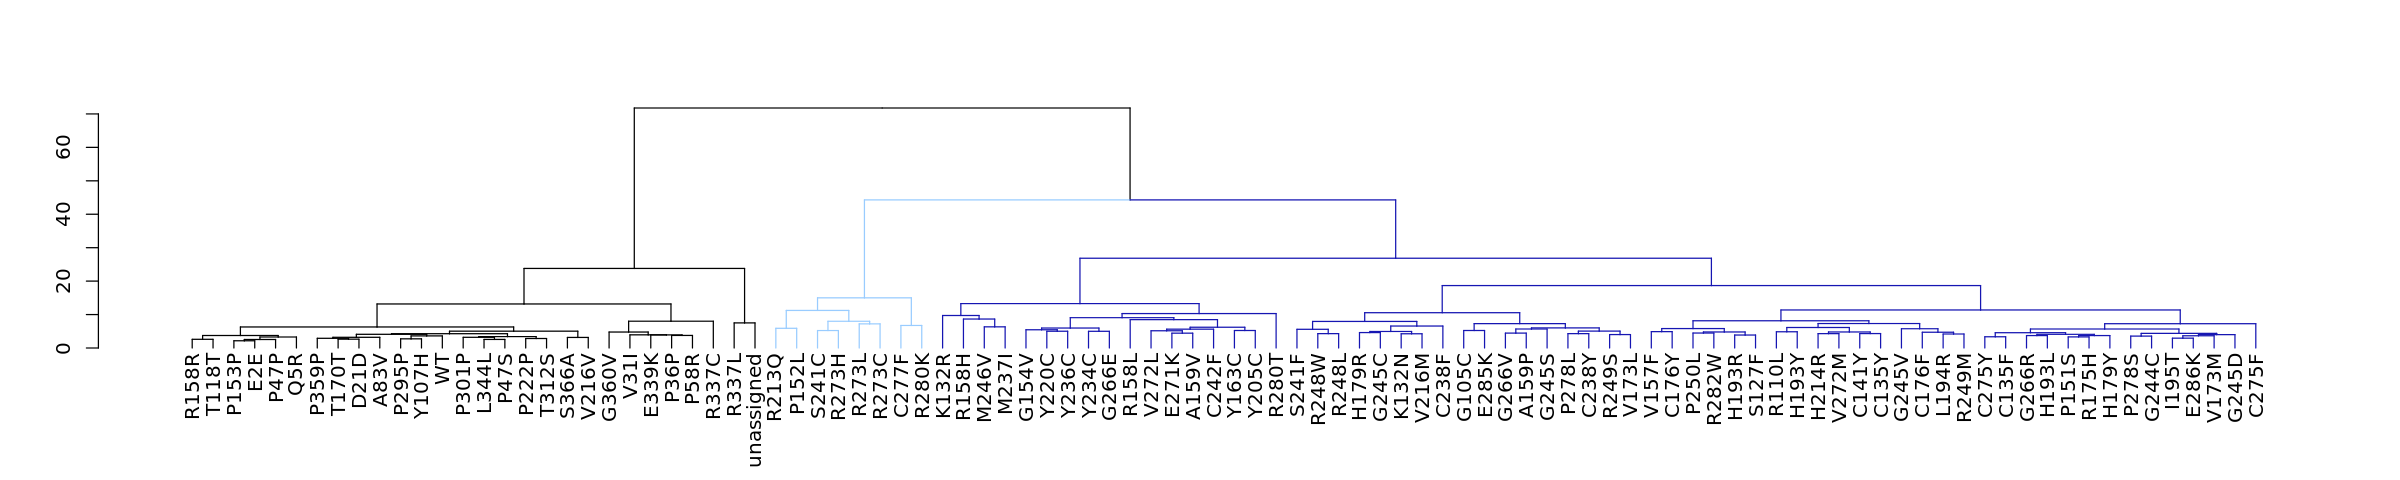

In [14]:
options(repr.plot.width=20, repr.plot.height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','#1616B2'))
plot(d1)

In [17]:
options(repr.plot.width=20, repr.plot.height=4)
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/TP53'
pdf(paste(f_pref,'.dendrogram.lowMOI.pdf',sep=''),width=20,height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','#1616B2'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.lowMOI.pdf',sep=''))
dev.off()

NULL


png 
  2

[1] "/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/TP53.dendrogram.lowMOI.pdf"


null device 
          1

In [16]:
par('mar')
par(mar=c(1,1,1,1))

[1] 5.1 4.1 4.1 2.1

In [18]:
png()
dev.off()

png 
  2

In [18]:
sorted_variants=rownames(x)[order.dendrogram(dend)]
sorted_variants_df=data.frame(variant=sorted_variants,
                              color=get_leaves_branches_col(d1))

In [19]:
res='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.corrL1.sorted_variants_lowMOI.csv'
write.table(sorted_variants_df,res,sep=',',quote=FALSE,row.names=FALSE,col.names=FALSE)